In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve

from sklearn.ensemble import RandomForestClassifier

   int_corr     age_o    attr_o       age  ...  dec_o  imprelig  goal  date
0  0.557471  0.243243  0.571429  0.081081  ...      0       4.0   2.0   7.0
1  0.787356  0.108108  0.666667  0.081081  ...      0       4.0   2.0   7.0
2  0.568966  0.108108  0.952381  0.081081  ...      1       4.0   2.0   7.0
3  0.827586  0.135135  0.666667  0.081081  ...      1       4.0   2.0   7.0
4  0.597701  0.162162  0.761905  0.081081  ...      1       4.0   2.0   7.0

[5 rows x 47 columns]


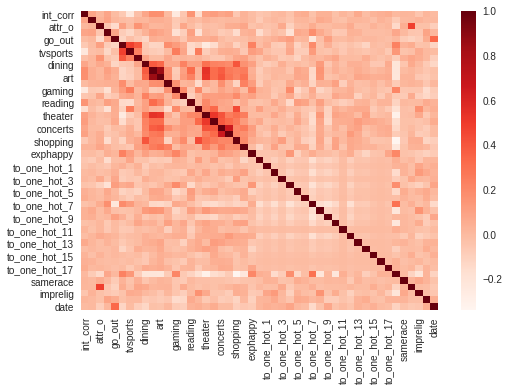

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/processed_data.csv", error_bad_lines=False)
plt.style.use('seaborn')
Y = data['match']
X = data[['int_corr', 'age_o', 'attr_o', 'age', 'go_out', 'sports',
 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
 'shopping', 'yoga', 'exphappy', 'to_one_hot_0', 'to_one_hot_1', 'to_one_hot_2',
 'to_one_hot_3', 'to_one_hot_4', 'to_one_hot_5', 'to_one_hot_6',
 'to_one_hot_7', 'to_one_hot_8', 'to_one_hot_9', 'to_one_hot_10',
 'to_one_hot_11', 'to_one_hot_12', 'to_one_hot_13', 'to_one_hot_14',
 'to_one_hot_15', 'to_one_hot_16', 'to_one_hot_17', 'gender',
 'samerace', 'dec_o', 'imprelig','goal', 'date']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state = 42)

data.drop('match', inplace=True, axis=1)
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('field_cd', inplace=True, axis=1)
data.drop('go_out.1', inplace=True, axis=1)

print(data.head(5))

cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show( )

In [6]:
# parameters = {
#             'n_estimators': [trees for trees in range(1050, 1101, 10)],
#             'max_depth': [depth for depth in range(30, 61, 10)]
#         }

# model = RandomForestClassifier(random_state=42)

# clf = GridSearchCV(
#     model, parameters, scoring = "f1", verbose = 10, n_jobs = -1, cv = 5
# )

# clf.fit(X_train, Y_train)

# print("Best parameters: \n")
# print(clf.best_params_)

In [3]:
randomForest = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=30, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1050,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1050,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [7]:
Y_pred=randomForest.predict(X_test)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1990
           1       0.56      0.43      0.49       391

    accuracy                           0.85      2381
   macro avg       0.73      0.68      0.70      2381
weighted avg       0.84      0.85      0.84      2381



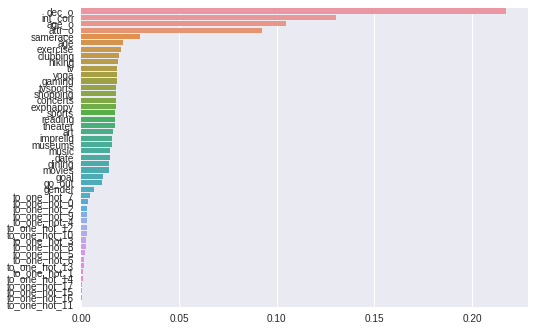

In [8]:
features = pd.Series(randomForest.feature_importances_, index = data.columns.values).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)

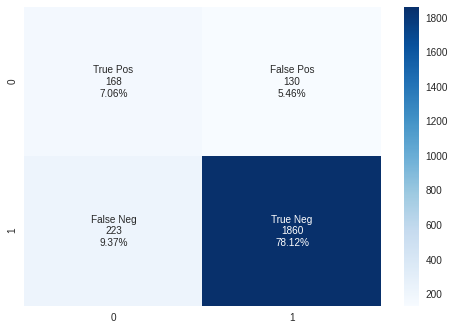

In [9]:
cm_i = confusion_matrix(Y_test, Y_pred)  
cm = cm_i.copy()

cm[0][0] = cm_i[1][1]
cm[1][1] = cm_i[0][0]

groups = ['True Pos' ,'False Pos','False Neg', 'True Neg']
counter = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{g}\n{c}\n{p}" for g, c, p in
          zip(groups ,counter,percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Text(0, 0.5, 'True Positive rate')

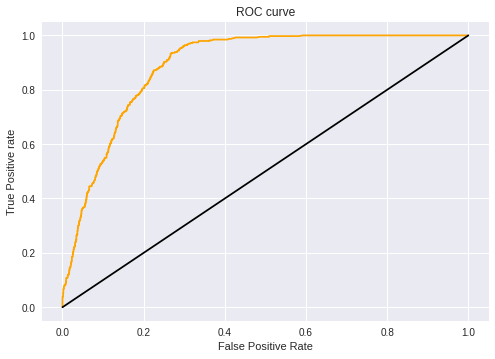

In [10]:
predict_prob = randomForest.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(Y_test, predict_prob, pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr, tpr, color='orange')
plt.plot(p_fpr, p_tpr, color='black')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

   Unnamed: 0  int_corr     age_o    attr_o  ...  imprelig  goal  date  go_out.1
0           0  0.557471  0.243243  0.571429  ...       4.0   2.0   7.0       1.0
1           1  0.787356  0.108108  0.666667  ...       4.0   2.0   7.0       1.0
2           2  0.568966  0.108108  0.952381  ...       4.0   2.0   7.0       1.0
3           3  0.827586  0.135135  0.666667  ...       4.0   2.0   7.0       1.0
4           4  0.597701  0.162162  0.761905  ...       4.0   2.0   7.0       1.0

[5 rows x 51 columns]


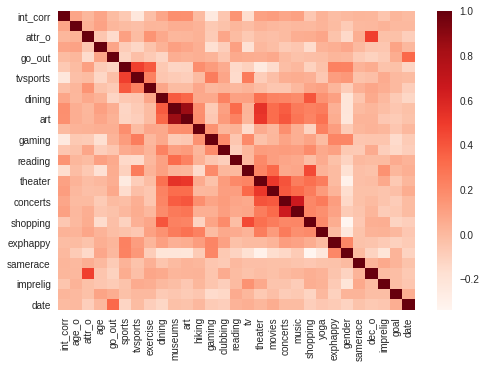

In [11]:
data = pd.read_csv("/content/drive/MyDrive/Master/Anul 1/Semestrul 1/Exploratory Data Analysis/Proiect/processed_data.csv", error_bad_lines=False)
print(data.head(5))

Y = data['match']
X = data[['int_corr', 'age_o', 'attr_o', 'age', 'go_out', 'sports',
 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
 'shopping', 'yoga', 'exphappy', 'gender',
 'samerace', 'dec_o', 'imprelig','goal', 'date']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, shuffle = True, random_state = 42)

data.drop('match', inplace=True, axis=1)
data.drop('Unnamed: 0', inplace=True, axis=1)
data.drop('field_cd', inplace=True, axis=1)
data.drop('go_out.1', inplace=True, axis=1)
data.drop('to_one_hot_0', inplace=True, axis=1)
data.drop('to_one_hot_1', inplace=True, axis=1)
data.drop('to_one_hot_2', inplace=True, axis=1)
data.drop('to_one_hot_3', inplace=True, axis=1)
data.drop('to_one_hot_4', inplace=True, axis=1)
data.drop('to_one_hot_5', inplace=True, axis=1)
data.drop('to_one_hot_6', inplace=True, axis=1)
data.drop('to_one_hot_7', inplace=True, axis=1)
data.drop('to_one_hot_8', inplace=True, axis=1)
data.drop('to_one_hot_9', inplace=True, axis=1)
data.drop('to_one_hot_10', inplace=True, axis=1)
data.drop('to_one_hot_11', inplace=True, axis=1)
data.drop('to_one_hot_12', inplace=True, axis=1)
data.drop('to_one_hot_13', inplace=True, axis=1)
data.drop('to_one_hot_14', inplace=True, axis=1)
data.drop('to_one_hot_15', inplace=True, axis=1)
data.drop('to_one_hot_16', inplace=True, axis=1)
data.drop('to_one_hot_17', inplace=True, axis=1)


cor = data.corr()
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [12]:
# parameters = {
#             'n_estimators': [trees for trees in range(620, 701, 100)],
#             'max_depth': [depth for depth in range(35, 45, 1)],
#         }


# model = RandomForestClassifier(random_state=42)

# clf = GridSearchCV(
#     model, parameters, scoring = "f1", verbose = 10, n_jobs = -1, cv = 5
# )

# clf.fit(X_train, Y_train)

# print("Best parameters: \n")
# print(clf.best_params_)

In [13]:
randomForest = RandomForestClassifier(            
            bootstrap=True, class_weight=None,
            criterion='gini', max_depth=35, max_features='auto',
            max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=620,
            n_jobs=None, oob_score=False, random_state=42, verbose=0,
            warm_start=False)

randomForest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=35, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=620,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [14]:
Y_pred=randomForest.predict(X_test)

print("Accuracy:",accuracy_score(Y_test, Y_pred))
print('\n')
print(classification_report(Y_test, Y_pred))

print(Y_pred)
print(Y_test.to_numpy())

Accuracy: 0.8458630827383452


              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1990
           1       0.54      0.43      0.48       391

    accuracy                           0.85      2381
   macro avg       0.72      0.68      0.69      2381
weighted avg       0.83      0.85      0.84      2381

[0 0 0 ... 1 0 1]
[0 0 0 ... 0 0 1]


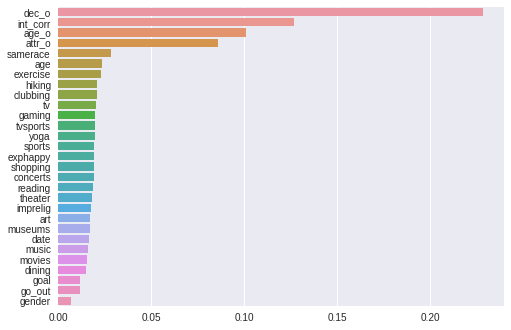

In [15]:
features = pd.Series(randomForest.feature_importances_, index = data.columns.values).sort_values(ascending=False)

sns.barplot(x=features, y=features.index)

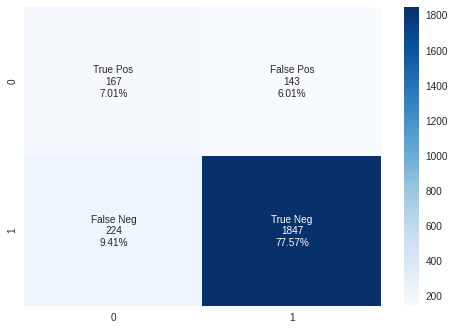

In [16]:
cm_i = confusion_matrix(Y_test, Y_pred)  
cm = cm_i.copy()

cm[0][0] = cm_i[1][1]
cm[1][1] = cm_i[0][0]

groups = ['True Pos' ,'False Pos','False Neg', 'True Neg']
counter = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{g}\n{c}\n{p}" for g, c, p in
          zip(groups ,counter,percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

Text(0, 0.5, 'True Positive rate')

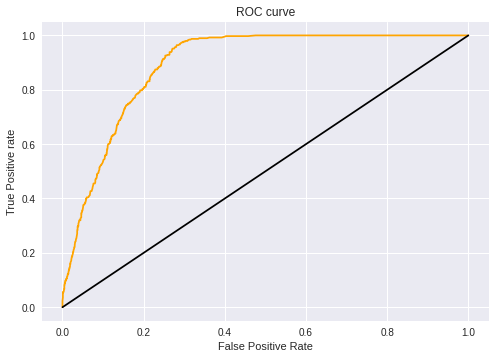

In [17]:
predict_prob = randomForest.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(Y_test, predict_prob, pos_label=1)

random_probs = [0 for i in range(len(Y_test))]
p_fpr, p_tpr, _ = roc_curve(Y_test, random_probs, pos_label=1)

plt.style.use('seaborn')
plt.plot(fpr, tpr, color='orange')
plt.plot(p_fpr, p_tpr, color='black')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')